In [1]:
import pickle

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import cv2

In [5]:
cv2.__version__

'3.4.2'

In [6]:
import imageio
import PIL

In [7]:
imageio.__version__

'2.5.0'

In [8]:
PIL.__version__

'5.3.0'

In [9]:
import scipy.ndimage

In [87]:
imageio.plugins.freeimage.download()

Imageio: 'libfreeimage-3.16.0-osx10.6.dylib' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/freeimage/libfreeimage-3.16.0-osx10.6.dylib (4.3 MB)
Downloading: 8192/4461680 bytes (0.2%245760/4461680 bytes (5.5%491520/4461680 bytes (11.0720896/4461680 bytes (16.21015808/4461680 bytes (22.8%1359872/4461680 bytes (30.5%1695744/4461680 bytes (38.0%2015232/4461680 bytes (45.2%2326528/4461680 bytes (52.1%2678784/4461680 bytes (60.0%2965504/4461680 bytes (66.5%3211264/4461680 bytes (72.0%3424256/4461680 bytes (76.7%3768320/4461680 bytes (84.5%4096000/4461680 bytes (91.8%4440064/4461680 bytes (99.5%4461680/4461680 bytes (100.0%)
  Done
File saved as /Users/sashakapralov/Library/Application Support/imageio/freeimage/libfreeimage-3.16.0-osx10.6.dylib.


### Investigate loading of tower mask data

In [10]:
#load dictionary of masks (pixel locations of correctly identified towers)
with open("masks_dict.pkl", "rb") as md:
    final_mask_dict = pickle.load(md)

In [11]:
len(final_mask_dict)

27

In [12]:
final_mask_dict.keys()

dict_keys(['frame11288_splash.jpg', 'frame11289_splash.jpg', 'frame12048_splash.jpg', 'frame12049_splash.jpg', 'frame12050_splash.jpg', 'frame12052_splash.jpg', 'frame12053_splash.jpg', 'frame12054_splash.jpg', 'frame12055_splash.jpg', 'frame12056_splash.jpg', 'frame12057_splash.jpg', 'frame12058_splash.jpg', 'frame12349_splash.jpg', 'frame12350_splash.jpg', 'frame12351_splash.jpg', 'frame12669_splash.jpg', 'frame12670_splash.jpg', 'frame12672_splash.jpg', 'frame13731_splash.jpg', 'frame13732_splash.jpg', 'frame14431_splash.jpg', 'frame16433_splash.jpg', 'frame16434_splash.jpg', 'frame18135_splash.jpg', 'frame33152_splash.jpg', 'frame7920_splash.jpg', 'frame7973_splash.jpg'])

In [13]:
final_mask_dict['frame18135_splash.jpg'].shape

(1080, 1920, 1)

In [14]:
final_mask_dict['frame12048_splash.jpg'].shape

(1080, 1920, 2)

In [15]:
final_mask_dict['frame12048_splash.jpg'][1,1,:]

array([False, False])

In [16]:
for img_file in final_mask_dict.keys():
    print(final_mask_dict[img_file].shape)

(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 2)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)
(1080, 1920, 1)


In [17]:
unique, counts = np.unique(final_mask_dict['frame12048_splash.jpg'], return_counts=True)

In [18]:
print(np.asarray((unique,counts)).T)

[[      0 4139850]
 [      1    7350]]


In [19]:
unique, counts = np.unique(final_mask_dict['frame12048_splash.jpg'][:,:,0], return_counts=True)
print(np.asarray((unique,counts)).T)

[[      0 2071608]
 [      1    1992]]


In [20]:
unique, counts = np.unique(final_mask_dict['frame12048_splash.jpg'][:,:,1], return_counts=True)
print(np.asarray((unique,counts)).T)

[[      0 2068242]
 [      1    5358]]


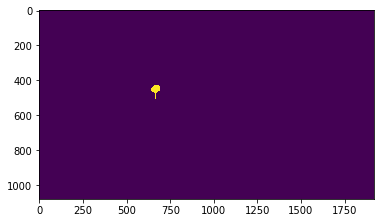

In [21]:
plt.imshow(final_mask_dict['frame12048_splash.jpg'][:,:,0])

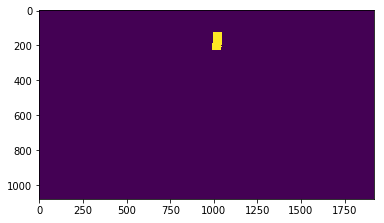

In [22]:
plt.imshow(final_mask_dict['frame12048_splash.jpg'][:,:,1])

In [23]:
#remove second (incorrect) splash from frame12048
temp_dict = {}
temp_dict['frame12048_splash.jpg'] = final_mask_dict['frame12048_splash.jpg']

In [24]:
temp_dict['frame12048_splash.jpg'] = np.delete(temp_dict['frame12048_splash.jpg'],1,2)

In [25]:
temp_dict['frame12048_splash.jpg'].shape

(1080, 1920, 1)

In [26]:
temp_dict.keys()

dict_keys(['frame12048_splash.jpg'])

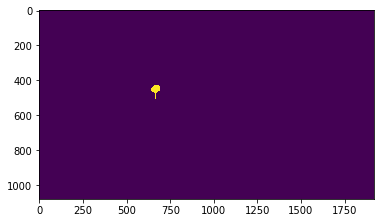

In [27]:
plt.imshow(temp_dict['frame12048_splash.jpg'][:,:,0])

In [28]:
#identify locations (indices) of pixels where splash is located
np.argwhere(temp_dict['frame12048_splash.jpg'][:,:,0]==True)

array([[428, 661],
       [428, 662],
       [428, 663],
       ...,
       [506, 668],
       [506, 669],
       [506, 670]])

In [46]:
splash_arr = np.argwhere(temp_dict['frame12048_splash.jpg'][:,:,0]==True)

### Investigate how to work with depth prediction arrays

In [30]:
#load depth prediction array for one image
with open("../../../../FCRN-DepthPrediction/tensorflow/pred_array.pkl", "rb") as pa:
    pred_array = pickle.load(pa)

In [31]:
pred_array.shape

(1, 544, 960, 1)

In [32]:
pred_array[:,1,1,:]

array([[0.92335385]], dtype=float32)

In [33]:
pred_array[:,100,200,:]

array([[1.0370883]], dtype=float32)

In [34]:
pred_array_sqz = pred_array[0,:,:,:]

In [35]:
pred_array_sqz.shape

(544, 960, 1)

In [36]:
pred_array_sqz[100,500]

array([0.94829893], dtype=float32)

In [37]:
pred_arr_sqz = pred_array[0,:,:,0]

In [38]:
pred_arr_sqz.shape

(544, 960)

#### Save array as EXR file and load it back from EXR to understand effect on array values

In [88]:
imageio.imwrite('./pred_arr_sqz_float.exr',pred_arr_sqz)

In [89]:
image_in = imageio.imread('./pred_arr_sqz_float.exr')

In [90]:
type(image_in)

imageio.core.util.Array

In [92]:
assert image_in.dtype == np.float32

In [93]:
image_in.shape

(544, 960)

In [94]:
image_in[100,500]

1.0654297

In [95]:
pred_arr_sqz[100,500]

1.0653863

In [104]:
np.argwhere(pred_arr_sqz==1.0653863)

array([[100, 500]])

In [107]:
np.argwhere(pred_arr_sqz==1.0654297)

array([], shape=(0, 2), dtype=int64)

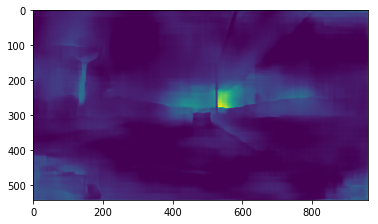

In [108]:
plt.imshow(pred_arr_sqz)

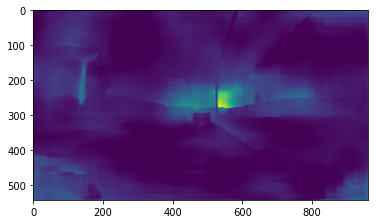

In [109]:
plt.imshow(image_in)

**CONCLUSION:** Saving and loading array from EXR modifies original array values

#### Use scipy.ndimage.interpolation.zoom to enlarge array without first saving it and loading it from EXR file

In [119]:
im2 = scipy.ndimage.interpolation.zoom(pred_arr_sqz, 2.)

In [120]:
im2.shape

(1088, 1920)

In [121]:
im2[100,100]

1.055502

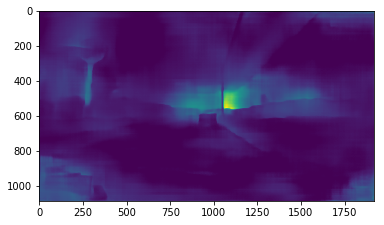

In [126]:
plt.imshow(im2)

In [123]:
im3 = scipy.ndimage.interpolation.zoom(pred_array_sqz, 2.)

In [129]:
im3.shape

(1088, 1920, 2)

In [125]:
im3[100,100,:]

array([1.055502, 1.055502], dtype=float32)

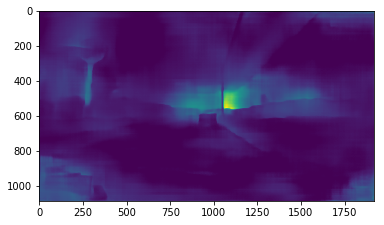

In [128]:
plt.imshow(im3[:,:,0])

#### Resize and plot array created from reading in of EXR file (using OpenCV)

In [110]:
r_in,c_in = image_in.shape
res_in = cv2.resize(image_in, (2*c_in, 2*r_in), interpolation = cv2.INTER_CUBIC)

In [111]:
res_in.shape

(1088, 1920)

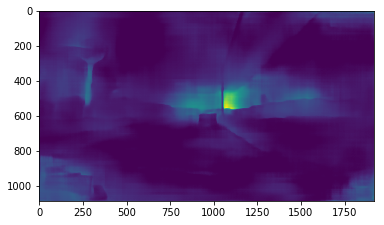

In [112]:
plt.imshow(res_in)

In [122]:
res_in[100,100]

1.0542848

**CONCLUSION:** OpenCV can resize this kind of array (created from loading EXR file) while still keeping float values, but the process of saving array to EXR file and loading it from EXR modifies values.

#### Save prediction array to EXR and load it using OpenCV, then resize it using OpenCV

In [70]:
cv2.imwrite('pred_array_sqz.exr',pred_array_sqz)

True

In [71]:
img = cv2.imread("pred_array_sqz.exr")

In [72]:
r,c = img.shape[:2]

In [73]:
r, c

(544, 960)

In [74]:
img[100,400,:]

array([1, 1, 1], dtype=uint8)

In [58]:
res = cv2.resize(img, (2*c, 2*r), interpolation = cv2.INTER_CUBIC)

In [59]:
type(res)

numpy.ndarray

In [60]:
res.shape

(1088, 1920, 3)

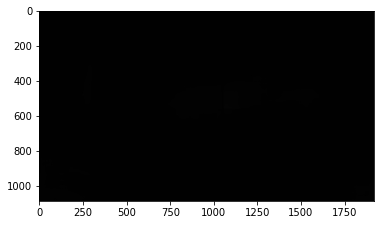

In [61]:
plt.imshow(res)

In [64]:
res[100,400,:]

array([1, 1, 1], dtype=uint8)

In [66]:
unique, counts = np.unique(res[:,:,0], return_counts=True)
print(np.asarray((unique,counts)).T)

[[      0     112]
 [      1 1950881]
 [      2  129434]
 [      3    7873]
 [      4     656]
 [      5       4]]


**CONCLUSION**: Using OpenCV directly on a float array does not work as OpenCV converts values from EXR file to integers

#### Enlarge array using OpenCV, but without first saving it to EXR file

In [130]:
r, c = pred_arr_sqz.shape
r, c

(544, 960)

In [131]:
im4 = cv2.resize(pred_arr_sqz, (c*2, r*2))

In [132]:
im4.shape

(1088, 1920)

In [133]:
im4[100,100]

1.0549669

In [43]:
im5 = cv2.resize(pred_arr_sqz, (1920,1080), interpolation = cv2.INTER_CUBIC)

In [44]:
im5.shape

(1080, 1920)

In [45]:
im5[100,100]

1.1371437

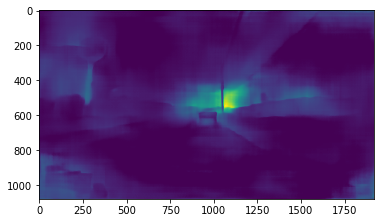

In [42]:
plt.imshow(im5)

**CONCLUSION:** Using OpenCV directly to resize a float array works and allows you to specify the exact dimensions of resized image

#### Test identifying pixels of mask on a depth prediction array and taking a trimmed mean of those pixel values 

In [47]:
splash_arr.shape

(1992, 2)

In [51]:
tuple(map(tuple,splash_arr))

((428, 661),
 (428, 662),
 (428, 663),
 (428, 664),
 (428, 665),
 (428, 666),
 (428, 667),
 (428, 668),
 (428, 669),
 (428, 670),
 (428, 671),
 (428, 672),
 (428, 673),
 (428, 674),
 (428, 675),
 (428, 676),
 (428, 677),
 (428, 678),
 (428, 679),
 (429, 659),
 (429, 660),
 (429, 661),
 (429, 662),
 (429, 663),
 (429, 664),
 (429, 665),
 (429, 666),
 (429, 667),
 (429, 668),
 (429, 669),
 (429, 670),
 (429, 671),
 (429, 672),
 (429, 673),
 (429, 674),
 (429, 675),
 (429, 676),
 (429, 677),
 (429, 678),
 (429, 679),
 (429, 680),
 (429, 681),
 (430, 658),
 (430, 659),
 (430, 660),
 (430, 661),
 (430, 662),
 (430, 663),
 (430, 664),
 (430, 665),
 (430, 666),
 (430, 667),
 (430, 668),
 (430, 669),
 (430, 670),
 (430, 671),
 (430, 672),
 (430, 673),
 (430, 674),
 (430, 675),
 (430, 676),
 (430, 677),
 (430, 678),
 (430, 679),
 (430, 680),
 (430, 681),
 (430, 682),
 (431, 657),
 (431, 658),
 (431, 659),
 (431, 660),
 (431, 661),
 (431, 662),
 (431, 663),
 (431, 664),
 (431, 665),
 (431, 666),

In [60]:
im5[tuple(splash_arr.T)]

array([0.9267784, 0.9282416, 0.9322611, ..., 1.0604843, 1.0615085,
       1.0594268], dtype=float32)

In [58]:
from scipy.stats import trim_mean

In [59]:
trim_mean(im5[tuple(splash_arr.T)],0.1)

/Users/sashakapralov/anaconda3/envs/py36_2/lib/python3.6/site-packages/scipy/stats/stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


0.9858812

In [61]:
arr_for_trim_mean = im5[tuple(splash_arr.T)]

In [62]:
trim_mean(arr_for_trim_mean,0.1)

/Users/sashakapralov/anaconda3/envs/py36_2/lib/python3.6/site-packages/scipy/stats/stats.py:2831: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.mean(atmp[sl], axis=axis)


0.9858812